## Загрузим нужные библиотеки

In [54]:
import os
import numpy as np
import pandas as pd
import re

from ast import literal_eval

In [2]:
#import plotly.express as px

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(30,16)}) # Setting seaborn as default style even if use only matplotlib
sns.set(font_scale = 2)
plt.rcParams['figure.figsize']=(30,16)

### Reproducibility block

In [3]:
# seed the RNG for all devices (both CPU and CUDA)
#torch.manual_seed(1984)

#Disabling the benchmarking feature causes cuDNN to deterministically select an algorithm, 
#possibly at the cost of reduced performance.
#torch.backends.cudnn.benchmark = False

# for custom operators,
import random
random.seed(5986721)

# 
np.random.seed(62185)

#sklearn take seed from a line abowe

In [4]:
def plot_hists_sns(inp_df, inp_feature):
    
    fig, axes = plt.subplots(4, 3, figsize=(30,30))
    
    sns.histplot(ax = axes[0, 0],
                data = inp_df,
                x = inp_feature,
                #hue = 'c2'
                )
    
    
#views
    tmp_df = inp_df.groupby([inp_feature]).views.agg(val_min='min', val_max='max', val_aver='mean')
    sns.barplot(ax = axes[1, 0],
               x = tmp_df.index,
               y = tmp_df.val_min.values,
                #hue = 'c2'
               )
    axes[1, 0].set_title(f'Histogram of minimum views over {inp_feature}')
    sns.barplot(ax = axes[1, 1],
               x = tmp_df.index,
               y = tmp_df.val_max.values,
                #hue = 'c2'
               )
    axes[1, 1].set_title(f'Histogram of maximum views over {inp_feature}')
    sns.barplot(ax = axes[1, 2],
               x = tmp_df.index,
               y = tmp_df.val_aver.values,
                #hue = 'c2'
               )
    axes[1, 2].set_title(f'Histogram of average views over {inp_feature}')
    
    
#depth
    tmp_df = inp_df.groupby([inp_feature]).depth.agg(val_min='min', val_max='max', val_aver='mean')
    sns.barplot(ax = axes[2, 0],
               x = tmp_df.index,
               y = tmp_df.val_min.values,
                #hue = 'c2'
               )
    axes[2, 0].set_title(f'Histogram of minimum depth over {inp_feature}')
    sns.barplot(ax = axes[2, 1],
               x = tmp_df.index,
               y = tmp_df.val_max.values,
                #hue = 'c2'
               )
    axes[2, 1].set_title(f'Histogram of maximum depth over {inp_feature}')
    sns.barplot(ax = axes[2, 2],
               x = tmp_df.index,
               y = tmp_df.val_aver.values,
                #hue = 'c2'
               )
    axes[2, 2].set_title(f'Histogram of average depth over {inp_feature}')
    
    
#full_reads_percent
    tmp_df = inp_df.groupby([inp_feature]).full_reads_percent.agg(val_min='min', val_max='max', val_aver='mean')
    sns.barplot(ax = axes[3, 0],
               x = tmp_df.index,
               y = tmp_df.val_min.values,
                #hue = 'c2'
               )
    axes[3, 0].set_title(f'Histogram of minimum full_reads_percent over {inp_feature}')
    sns.barplot(ax = axes[3, 1],
               x = tmp_df.index,
               y = tmp_df.val_max.values,
                #hue = 'c2'
               )
    axes[3, 1].set_title(f'Histogram of maximum full_reads_percent over {inp_feature}')
    sns.barplot(ax = axes[3, 2],
               x = tmp_df.index,
               y = tmp_df.val_aver.values,
                #hue = 'c2'
               )
    axes[3, 2].set_title(f'Histogram of aver full_reads_percent over {inp_feature}')
    
    fig.show()

In [5]:
def plot_corrc(inp_df, inp_cols, targ_cols = ['views', 'depth', 'full_reads_percent']):
    f, ax = plt.subplots(1, 2, figsize=(24, 8))
    sns.heatmap(df_train[inp_cols + targ_cols].corr(), 
    #sns.heatmap(df_train.query('c2 == 0')[inp_cols + targ_cols].corr(), 
                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[0])
    sns.heatmap(df_train[inp_cols + targ_cols].corr(method = 'spearman'), 
    #sns.heatmap(df_train.query('c2 == 1')[inp_cols + targ_cols].corr(), 
                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1])
#    sns.heatmap(df_train.query('c2 == 0')[inp_cols + targ_cols].corr(method = 'spearman'), 
#                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1, 0])
#    sns.heatmap(df_train.query('c2 == 1')[inp_cols + targ_cols].corr(method = 'spearman'), 
#                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1, 1])
    
    sns.pairplot(df_train[inp_cols + targ_cols], height = 16,) #hue = 'c2')


Выполним загрузу датсета

In [6]:
DIR_DATA  = os.path.join(os.getcwd(), 'data')
#DIR_TRAIN = os.path.join(DIR_DATA, 'train')
#DIR_TEST  = os.path.join(DIR_DATA, 'test')
DIR_SUBM  = os.path.join(os.getcwd(), 'subm')

In [20]:
#df_train = pd.read_csv(os.path.join(DIR_DATA, 'train.csv'), index_col= 0)
df_train = pd.read_csv(os.path.join(DIR_DATA, 'train_depth_classes.csv'))#, index_col= 0)

df_test = pd.read_csv(os.path.join(DIR_DATA, 'test.csv'))#, index_col= 0)

# Проанализируем датасет

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7000 non-null   object 
 1   publish_date        7000 non-null   object 
 2   session             7000 non-null   object 
 3   authors             7000 non-null   object 
 4   ctr                 7000 non-null   float64
 5   category            7000 non-null   object 
 6   tags                7000 non-null   object 
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
 10  c2                  7000 non-null   int64  
 11  c3                  7000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 710.9+ KB


In [9]:
df_train.describe()

ctr         views        depth  full_reads_percent          c2  \
count  7000.000000  7.000000e+03  7000.000000         7000.000000  7000.00000   
mean      2.217779  3.035162e+04     1.104794           34.619633     0.60200   
std       2.778085  9.547786e+04     0.065018           10.775901     0.48952   
min       0.000000  6.500000e+01     1.016000            4.978000     0.00000   
25%       0.000000  5.438250e+03     1.055000           27.516000     0.00000   
50%       1.348500  1.196200e+04     1.082000           34.334500     1.00000   
75%       3.598500  2.705300e+04     1.147000           41.366250     1.00000   
max      39.877000  2.554204e+06     1.799000          267.623000     1.00000   

                c3  
count  7000.000000  
mean      0.410714  
std       0.501205  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       2.000000

● **document id** - идентификатор    
● **title** - заголовок статьи   
● **publish_date** - время публикации   
● **session** - номер сессии   
● **authors** - код автора   
● **views** - количество просмотров   
● **depth** - объем прочитанного материала   
● **full_reads percent** - процент читателей полностью прочитавших статью   
● **ctr** - показатель кликабельности   
● **category** - категория статьи   
● **tags** - ключевые слова в статье   

In [10]:
df_train.shape, df_train.index.nunique()

((7000, 12), 7000)

In [11]:
df_train.columns

Index(['title', 'publish_date', 'session', 'authors', 'ctr', 'category',
       'tags', 'views', 'depth', 'full_reads_percent', 'c2', 'c3'],
      dtype='object')

## Targets

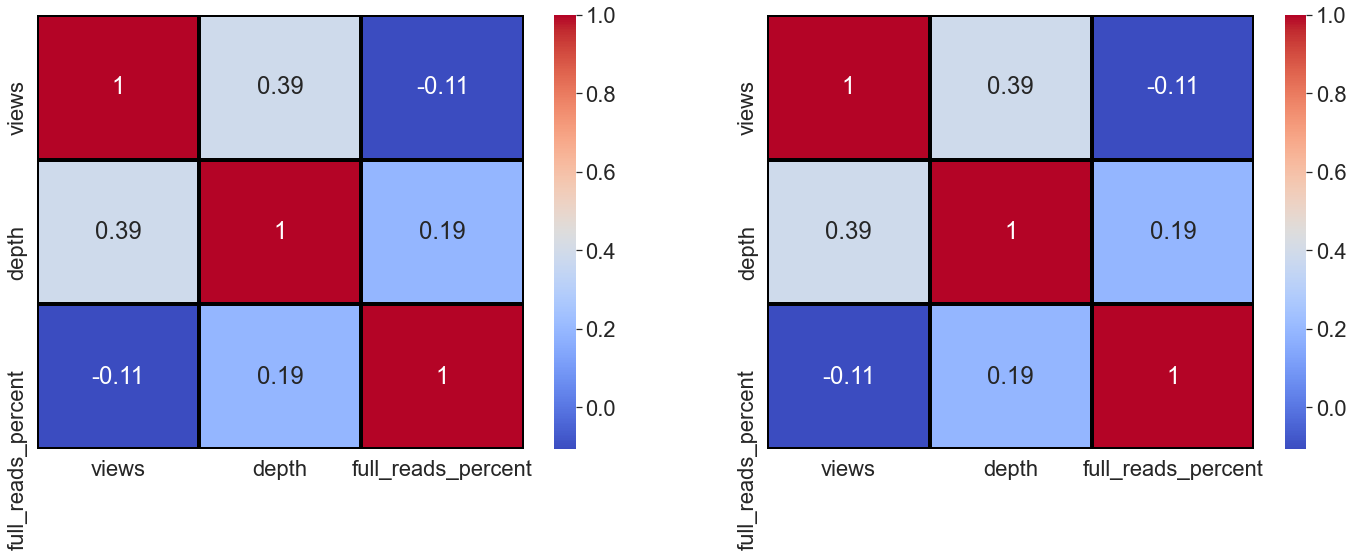

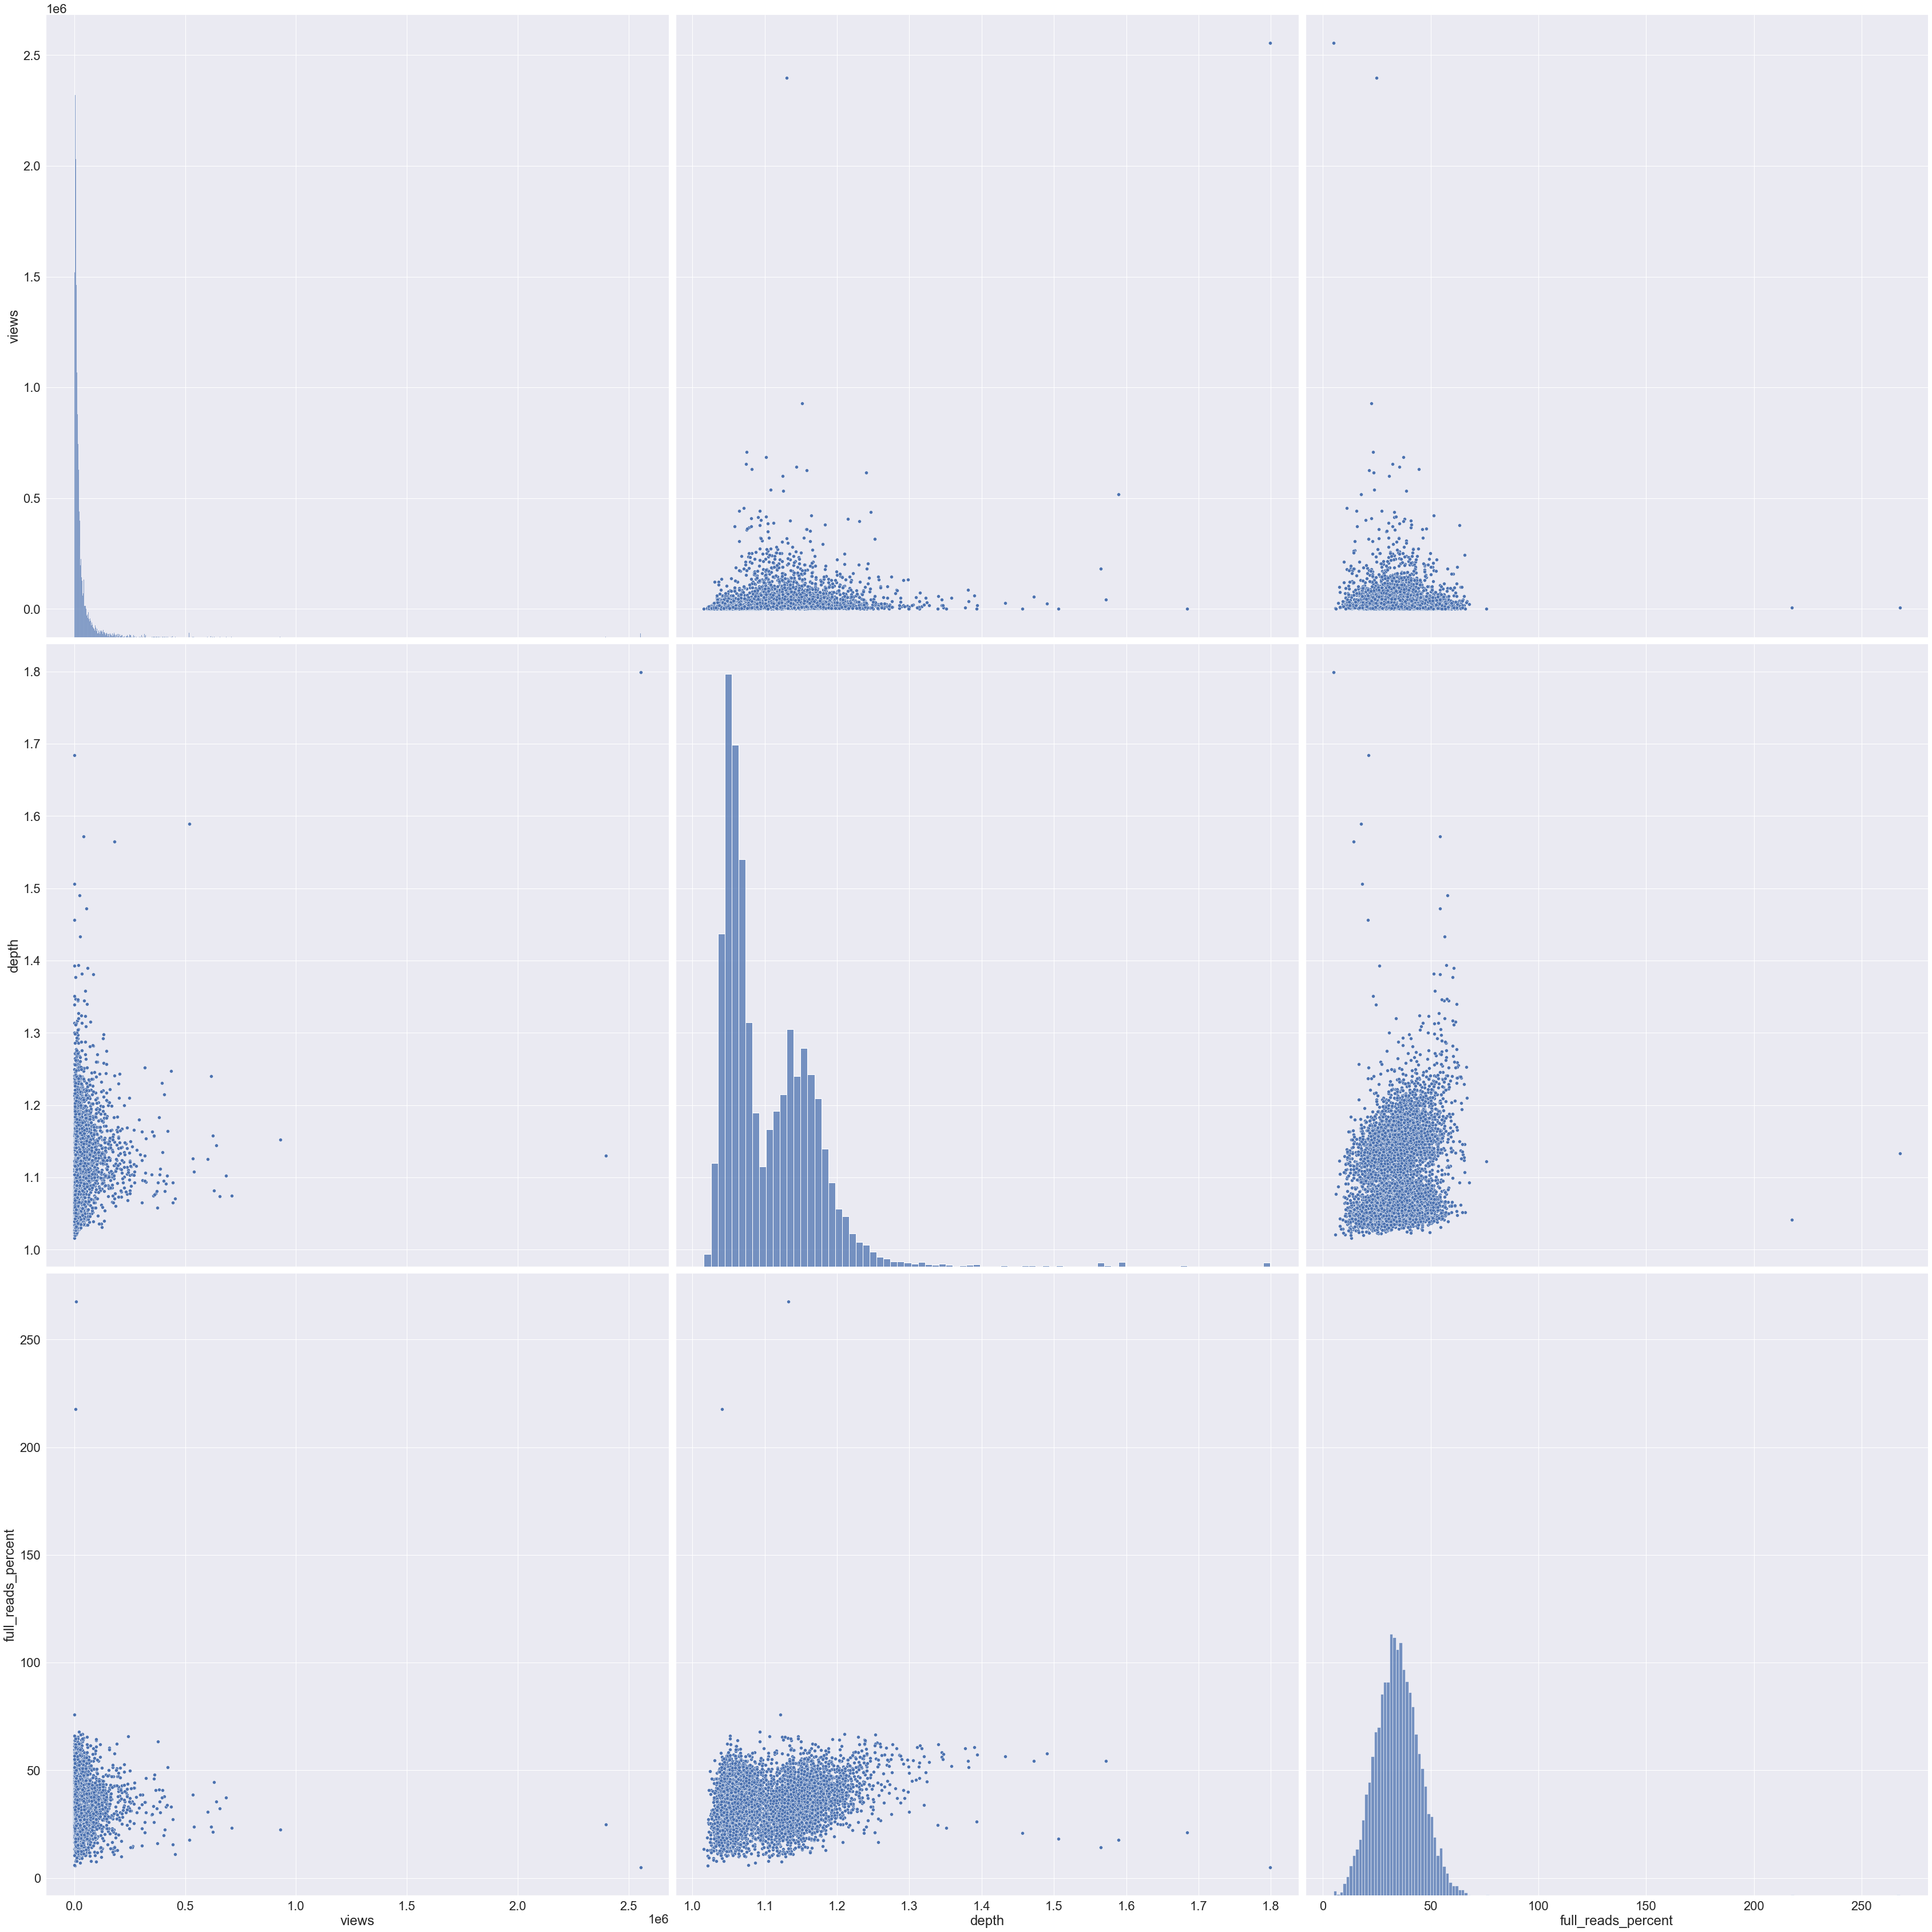

In [12]:
plot_corrc(df_train, ['views'], ['depth', 'full_reads_percent'])

Ожидаемо views может быть применено как фича для других таргетов.   
depth из состоит 2х распределений. необходимы 2 модели.    
между frp и двумя головами depth наглядно имеется корреляция.

In [167]:
df_train.full_reads_percent.nlargest(6)
#df_train.full_reads_percent.nsmallest(10)

document_id
620493199a794737f29908f0wCy2KZoJSJiKDhPixqcYZg    267.623
6271d52c9a7947d7db0ac981ciz7jAbTRRGPTfRmXmajDA    217.550
62366acc9a79475cac43e970La4nBiKdRjq-HPcQ4-YKBg     75.729
623aee679a79473f14281240Dd2iw8x3QwyFsxwT7qsyTQ     67.897
623abb1b9a794723857a6b38asdbqAtwSniZn6glDcdeaw     66.821
61fd1c389a79476c01f9b7414FscZrgoRHqAFoc_E9LB1A     66.630
Name: full_reads_percent, dtype: float64

более 200 явно шум, даже если приставить, что их кодировали/преобразовывали. отбрасываем
75 тоже ваыглядит шумам на фоне остальных. стоит пробовать как с ним, так и без него   

# publish_date

In [13]:
df_train['publish_date'] = pd.to_datetime(df_train['publish_date'])

df_train['m_d'] = df_train['publish_date'].dt.date

df_train['hour'] = df_train['publish_date'].dt.hour
df_train['dow'] = df_train['publish_date'].dt.dayofweek
#Monday=0, Sunday=6
df_train['weekend'] = (df_train.dow >= 4) # 5
#df_train['holidays']
df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

In [14]:
df_test['publish_date'] = pd.to_datetime(df_test['publish_date'])

проверим границы дат

In [15]:
df_train['publish_date'].min(), df_test['publish_date'].min()

(Timestamp('2017-08-07 13:00:27'), Timestamp('2021-10-04 11:51:32'))

In [16]:
df_train['publish_date'].max(), df_test['publish_date'].max()

(Timestamp('2022-05-29 20:13:12'), Timestamp('2022-05-29 19:44:21'))

In [17]:
df_train[df_train.publish_date > df_test['publish_date'].min()].shape

(6994, 18)

In [18]:
df_train[df_train.publish_date < df_test['publish_date'].min()].shape

(6, 18)

In [19]:
#df_train.sort_values(by='publish_date').head(15)

In [20]:
#df_test.sort_values(by='publish_date').head(15)

в тесте скачек с 2021-10-04 на 2022-01-31 21:00:26. Далее даты идут регулярно.

всего 6 статей в трейне датой раньше, чем минимальная дата в тесте.   
далее скачек: 2021-05-17, 2021-09-17, 2021-12-17, 2021-12-17, 2022-01-29 06:00:22.   
в целом все даты 21 года выглядят оторванными, однако, могут находится в том же распределении, так что, вероятно, их стоит оставить.   
статьи из 17 и 18 гг, вероятно стоит исключить после проверки на наличия в них особенных авторов или тэгов.

<AxesSubplot:xlabel='m_d'>

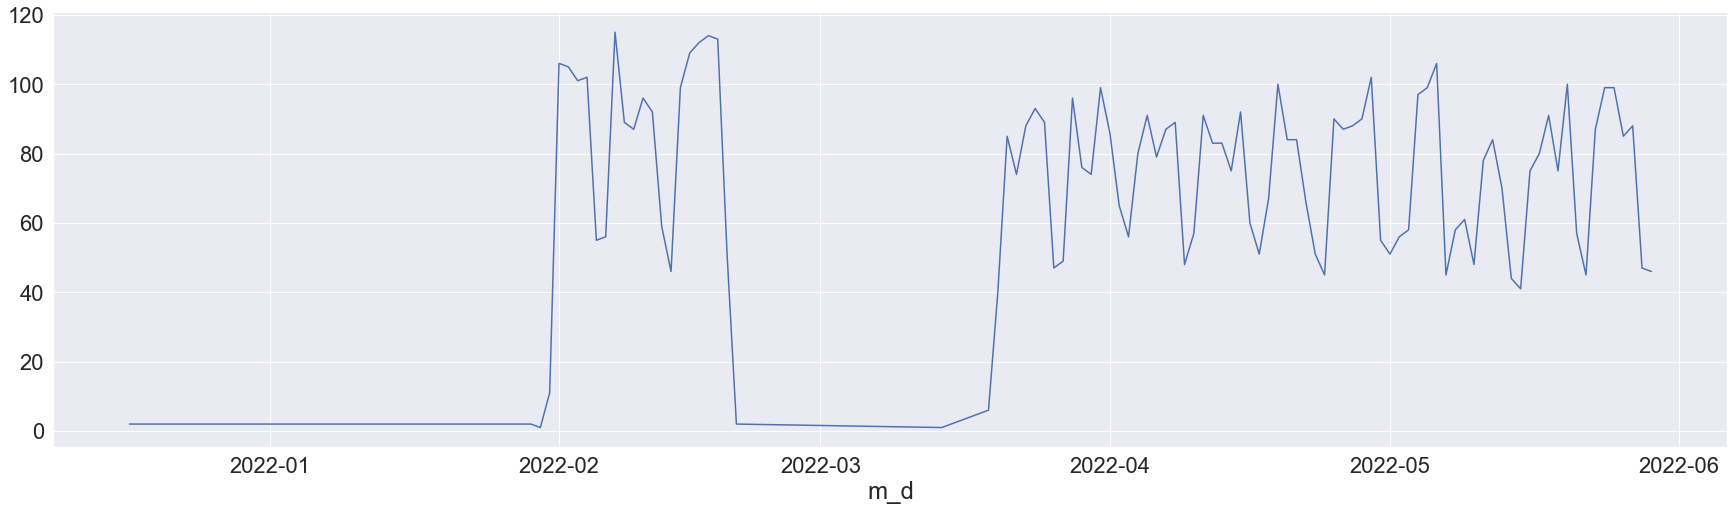

In [159]:
tmp = (df_train[df_train.publish_date > df_test['publish_date'].min()].sort_values('publish_date').groupby('m_d').agg('size'))
fig, ax = plt.subplots(1, 1, figsize = (30, 8))
sns.lineplot(y = tmp.values, x=tmp.keys(), ax = ax)

датасет хотелось бы увеличить, таких данных для добавления лагов недостаточно. однако непонятно откуда брать depth и frp   
виден недельный цикл

In [40]:
#tmp = df_train[df_train.publish_date > df_test['publish_date'].min()].sort_values('publish_date').groupby('m_d').m_d.diff()
#sns.lineplot(y = tmp.values, x=tmp.keys())

<AxesSubplot:>

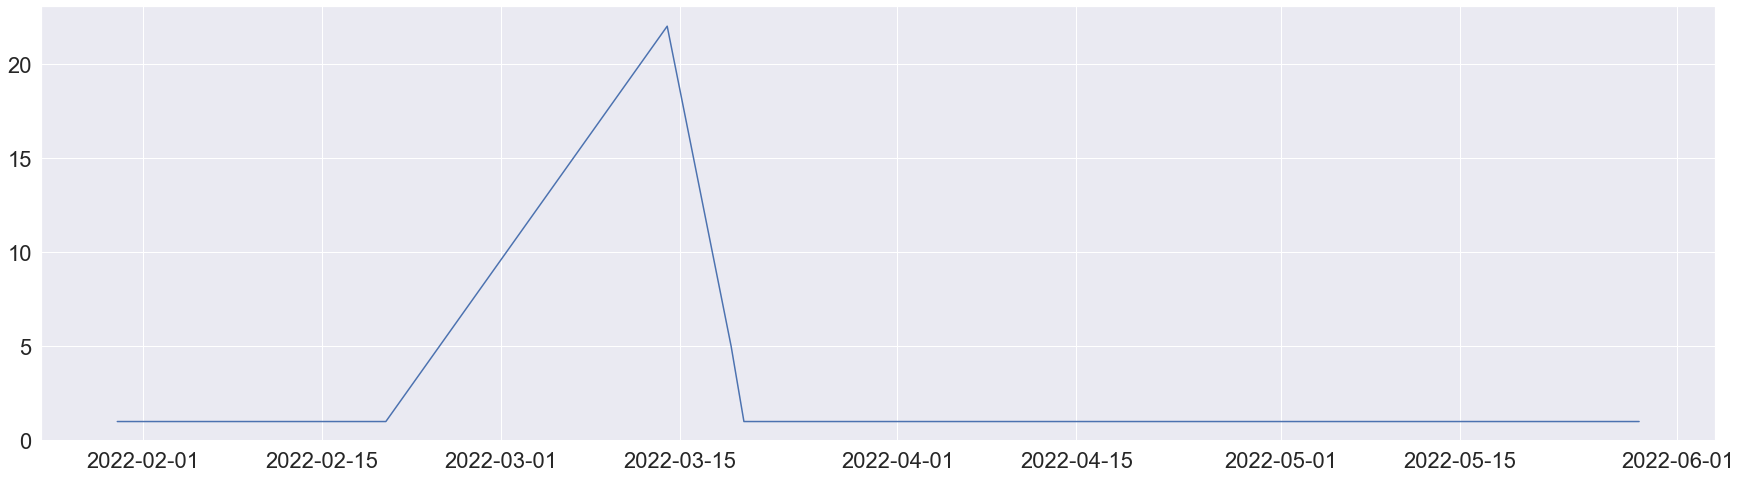

In [160]:
#min_time = pd.Timestamp('2022-01-01')
min_time = pd.Timestamp('2022-01-29')
tmp = df_train[df_train.publish_date > min_time][['publish_date', 'm_d']].sort_values('publish_date')['m_d'].drop_duplicates().diff()
tmp2 = df_train[df_train.publish_date > min_time][['publish_date', 'm_d']].sort_values('publish_date')['m_d'].drop_duplicates()

fig, ax = plt.subplots(1, 1, figsize = (30, 8))
sns.lineplot(x = tmp2.values, y = tmp.map(lambda x: x.days).values, ax = ax)

In [153]:
tmp2.nunique(), tmp.map(lambda x: x.days).value_counts()

(96,
 1.0     93
 22.0     1
 5.0      1
 Name: m_d, dtype: int64)

In [149]:
def plot_means(inp_df: pd.DataFrame, inp_cat: str = 'all'):
    
    if inp_cat != 'all':
        tmp = inp_df[inp_df.category == inp_cat]
    else:
        tmp = inp_df
        
    tmp = (tmp.sort_values('publish_date').groupby('m_d')[['views', 'depth', 'full_reads_percent']].agg('mean'))
    tmp.reset_index(inplace = True)
    
    fig, ax = plt.subplots(3, 2, figsize=(30, 20))
    
    sns.lineplot(x = tmp.m_d, y = tmp['views'], ax = ax[0, 0])
    #sns.kdeplot(x = tmp.m_d, y = tmp['views'], ax = ax[0, 1])
    sns.kdeplot(x = tmp['views'], ax = ax[0, 1], bw_adjust = 0.3)
    
    sns.lineplot(x = tmp.m_d, y = tmp['depth'], ax = ax[1, 0])
    #sns.kdeplot(x = tmp.m_d, y = tmp['depth'], ax = ax[1, 1])
    sns.kdeplot(x = tmp['depth'], ax = ax[1, 1], bw_adjust = 0.3)
    
    sns.lineplot(x = tmp.m_d, y = tmp['full_reads_percent'], ax = ax[2, 0])
    #sns.kdeplot(x = tmp.m_d, y = tmp['full_reads_percent'], ax = ax[2, 1])
    sns.kdeplot(x = tmp['full_reads_percent'], ax = ax[2, 1], bw_adjust = 0.3)
    

In [150]:
df_train.category.unique()

array(['5409f11ce063da9c8b588a18', '5409f11ce063da9c8b588a12',
       '5433e5decbb20f277b20eca9', '540d5ecacbb20f2524fc050a',
       '540d5eafcbb20f2524fc0509', '5409f11ce063da9c8b588a13',
       '5e54e2089a7947f63a801742', '552e430f9a79475dd957f8b3',
       '5e54e22a9a7947f560081ea2'], dtype=object)

In [154]:
#min_time = pd.Timestamp('2022-01-01')
min_time = pd.Timestamp('2022-01-29')

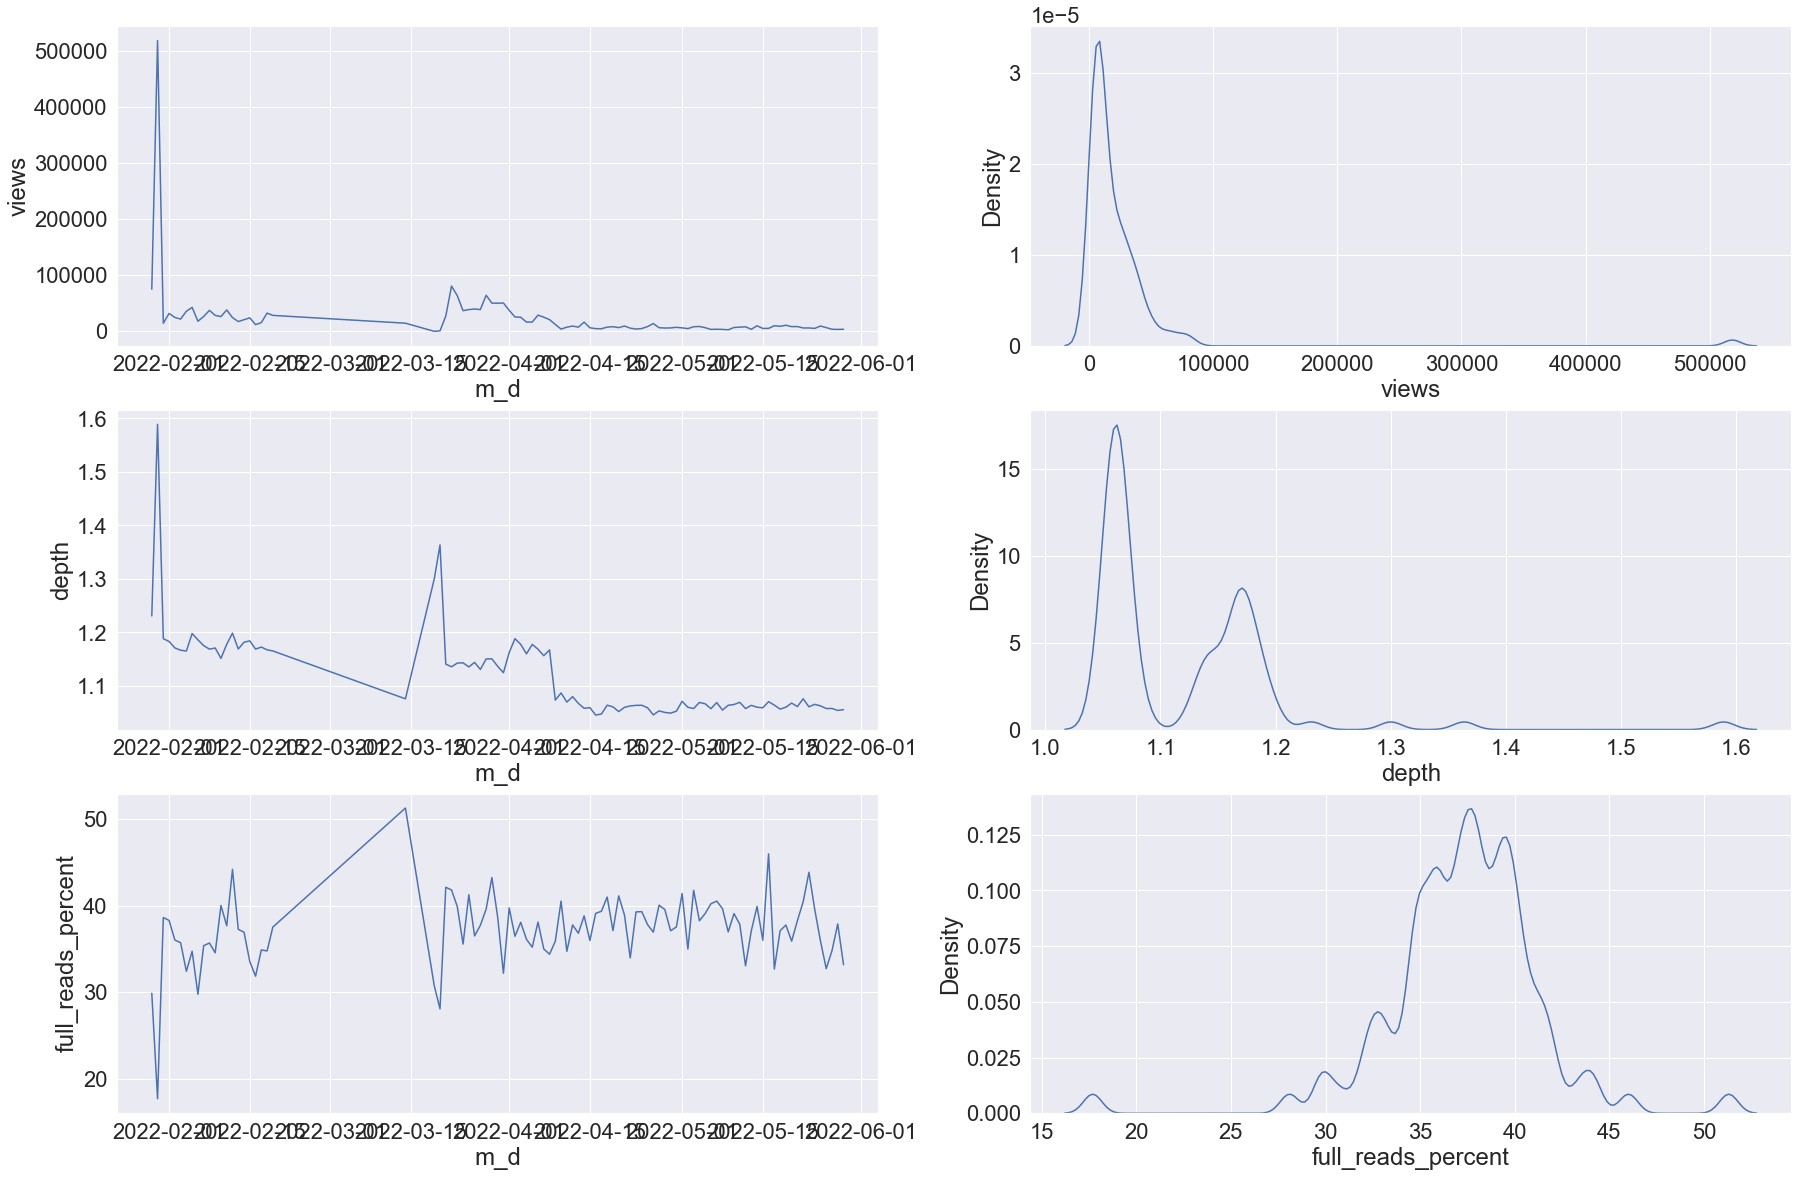

In [157]:
plot_means(df_train[df_train.publish_date > min_time], '5433e5decbb20f277b20eca9')

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


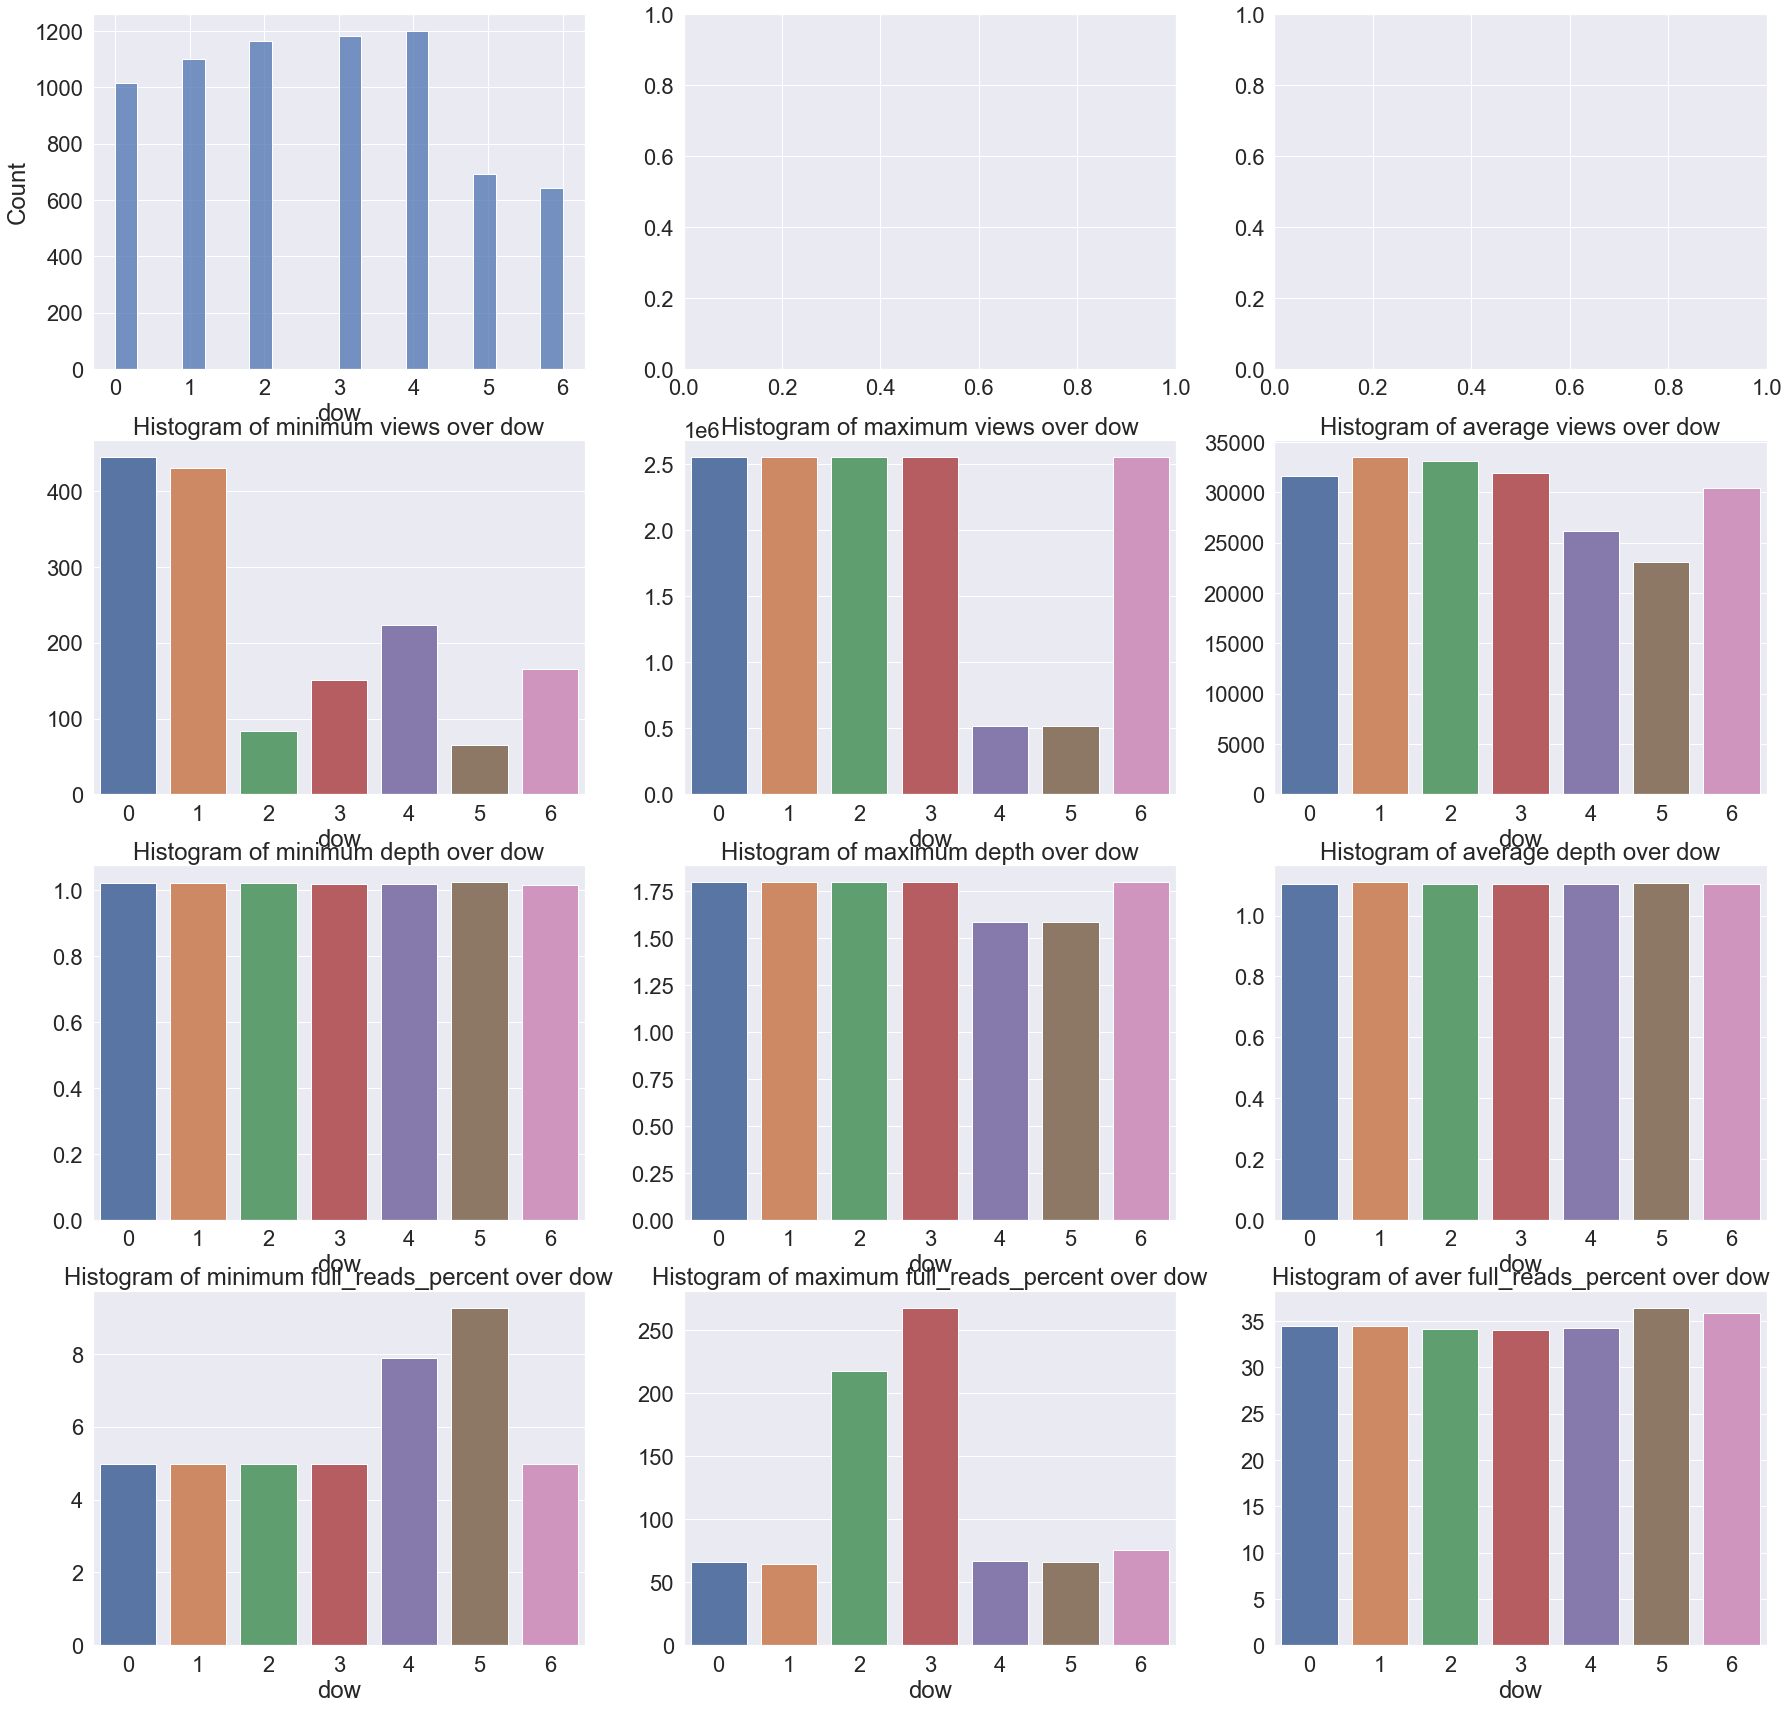

In [22]:
plot_hists_sns(df_train, 'dow')

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


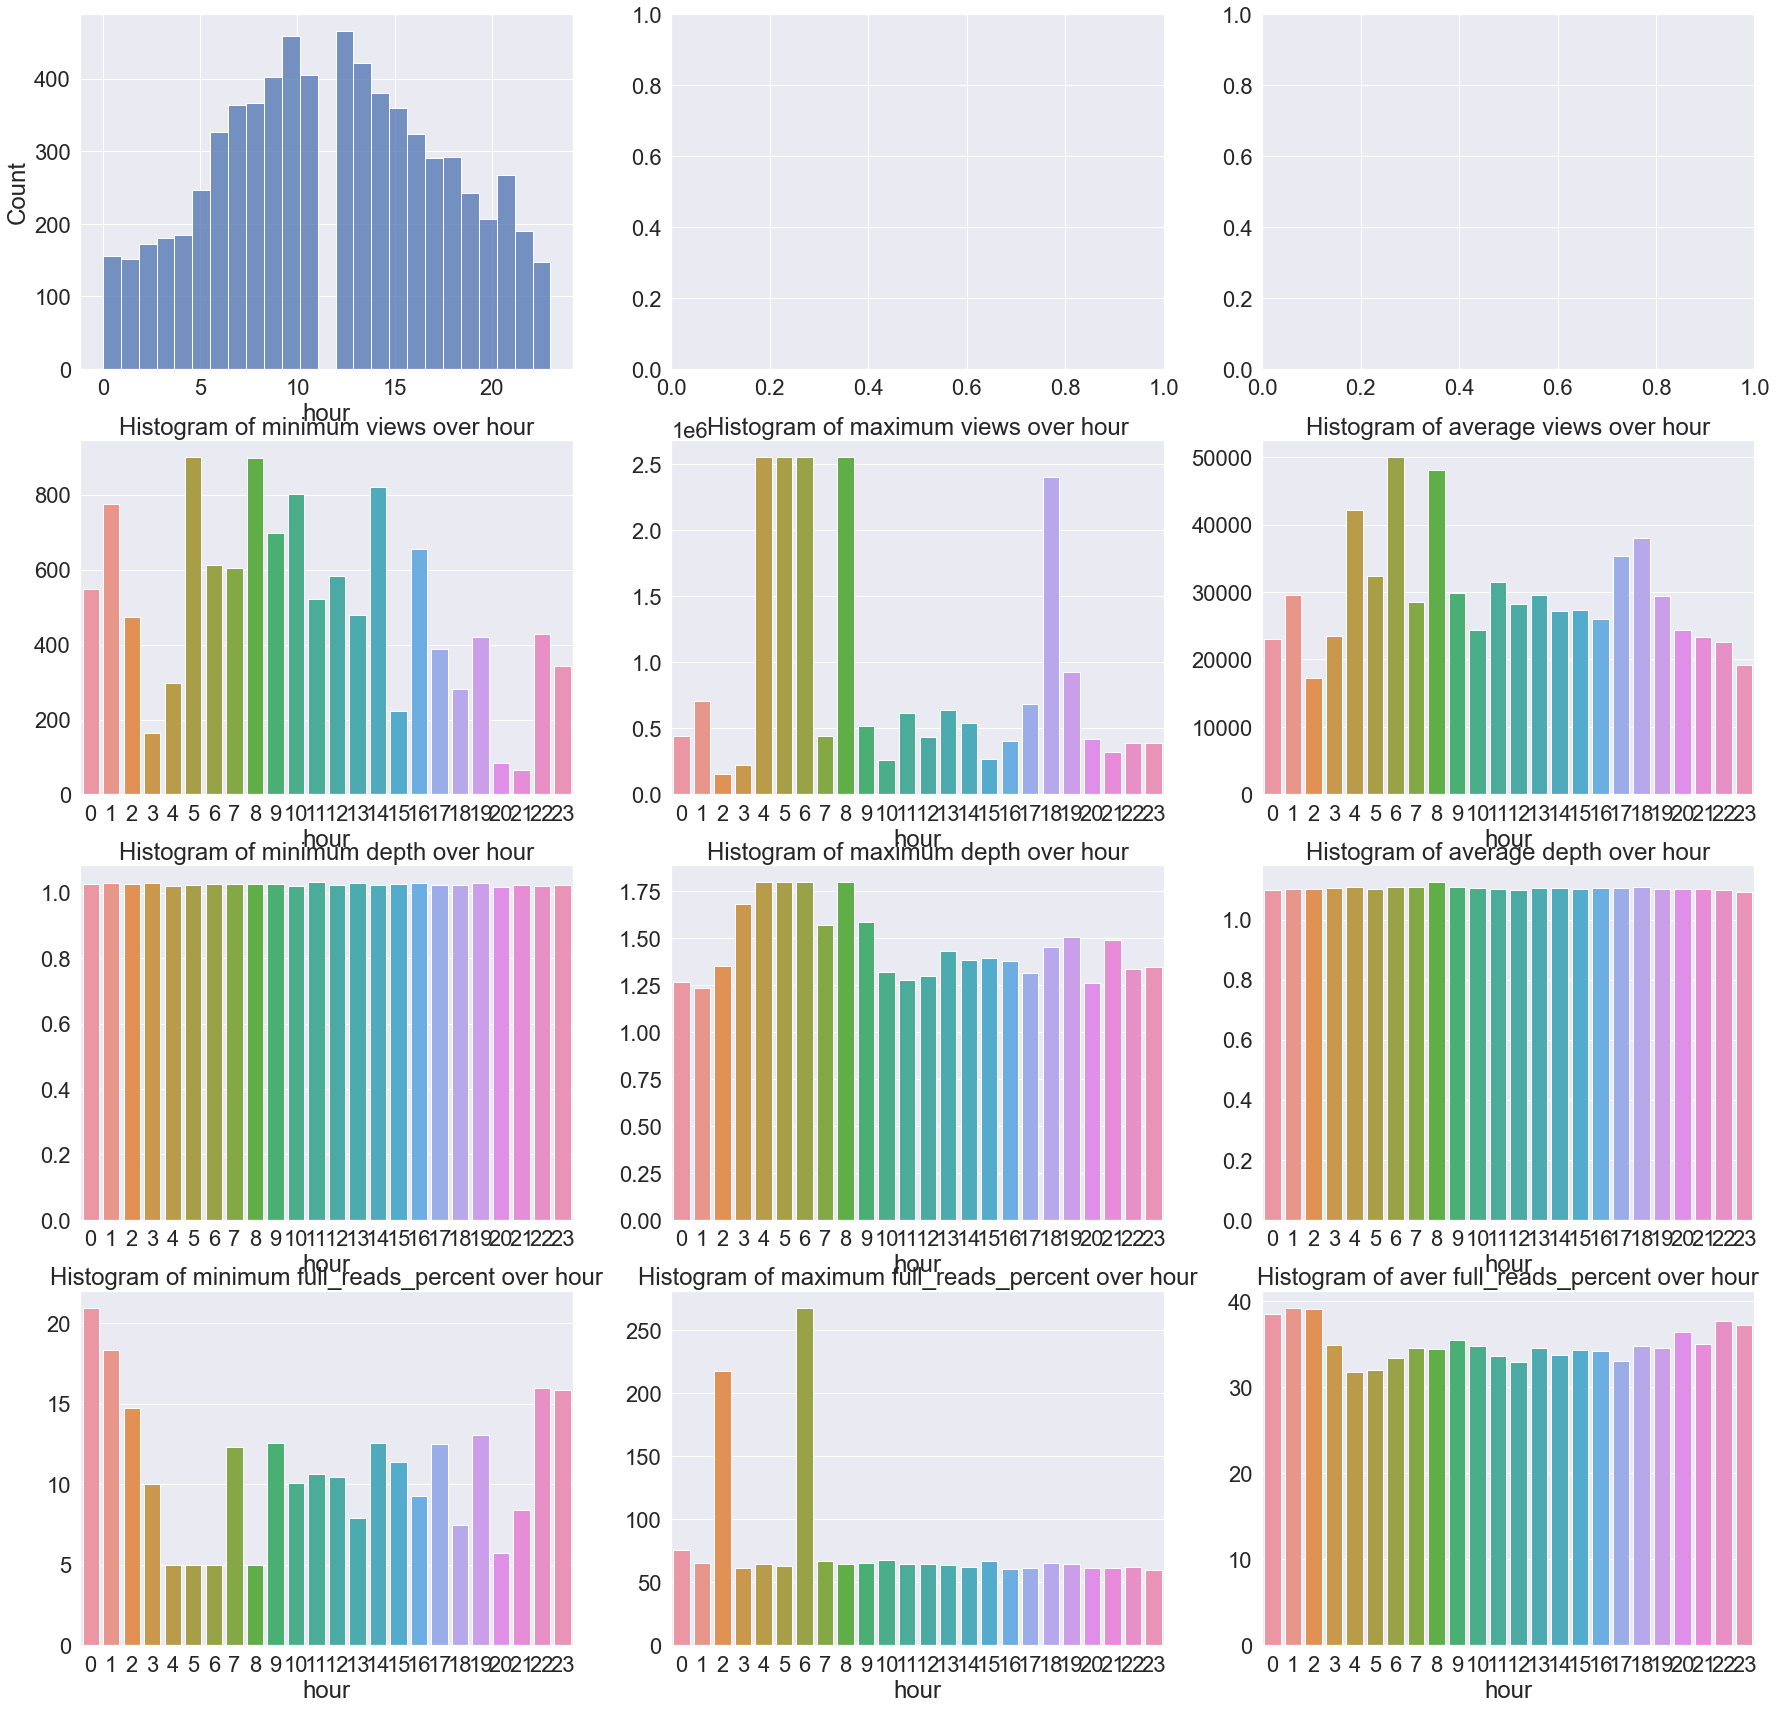

In [23]:
plot_hists_sns(df_train, 'hour')

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


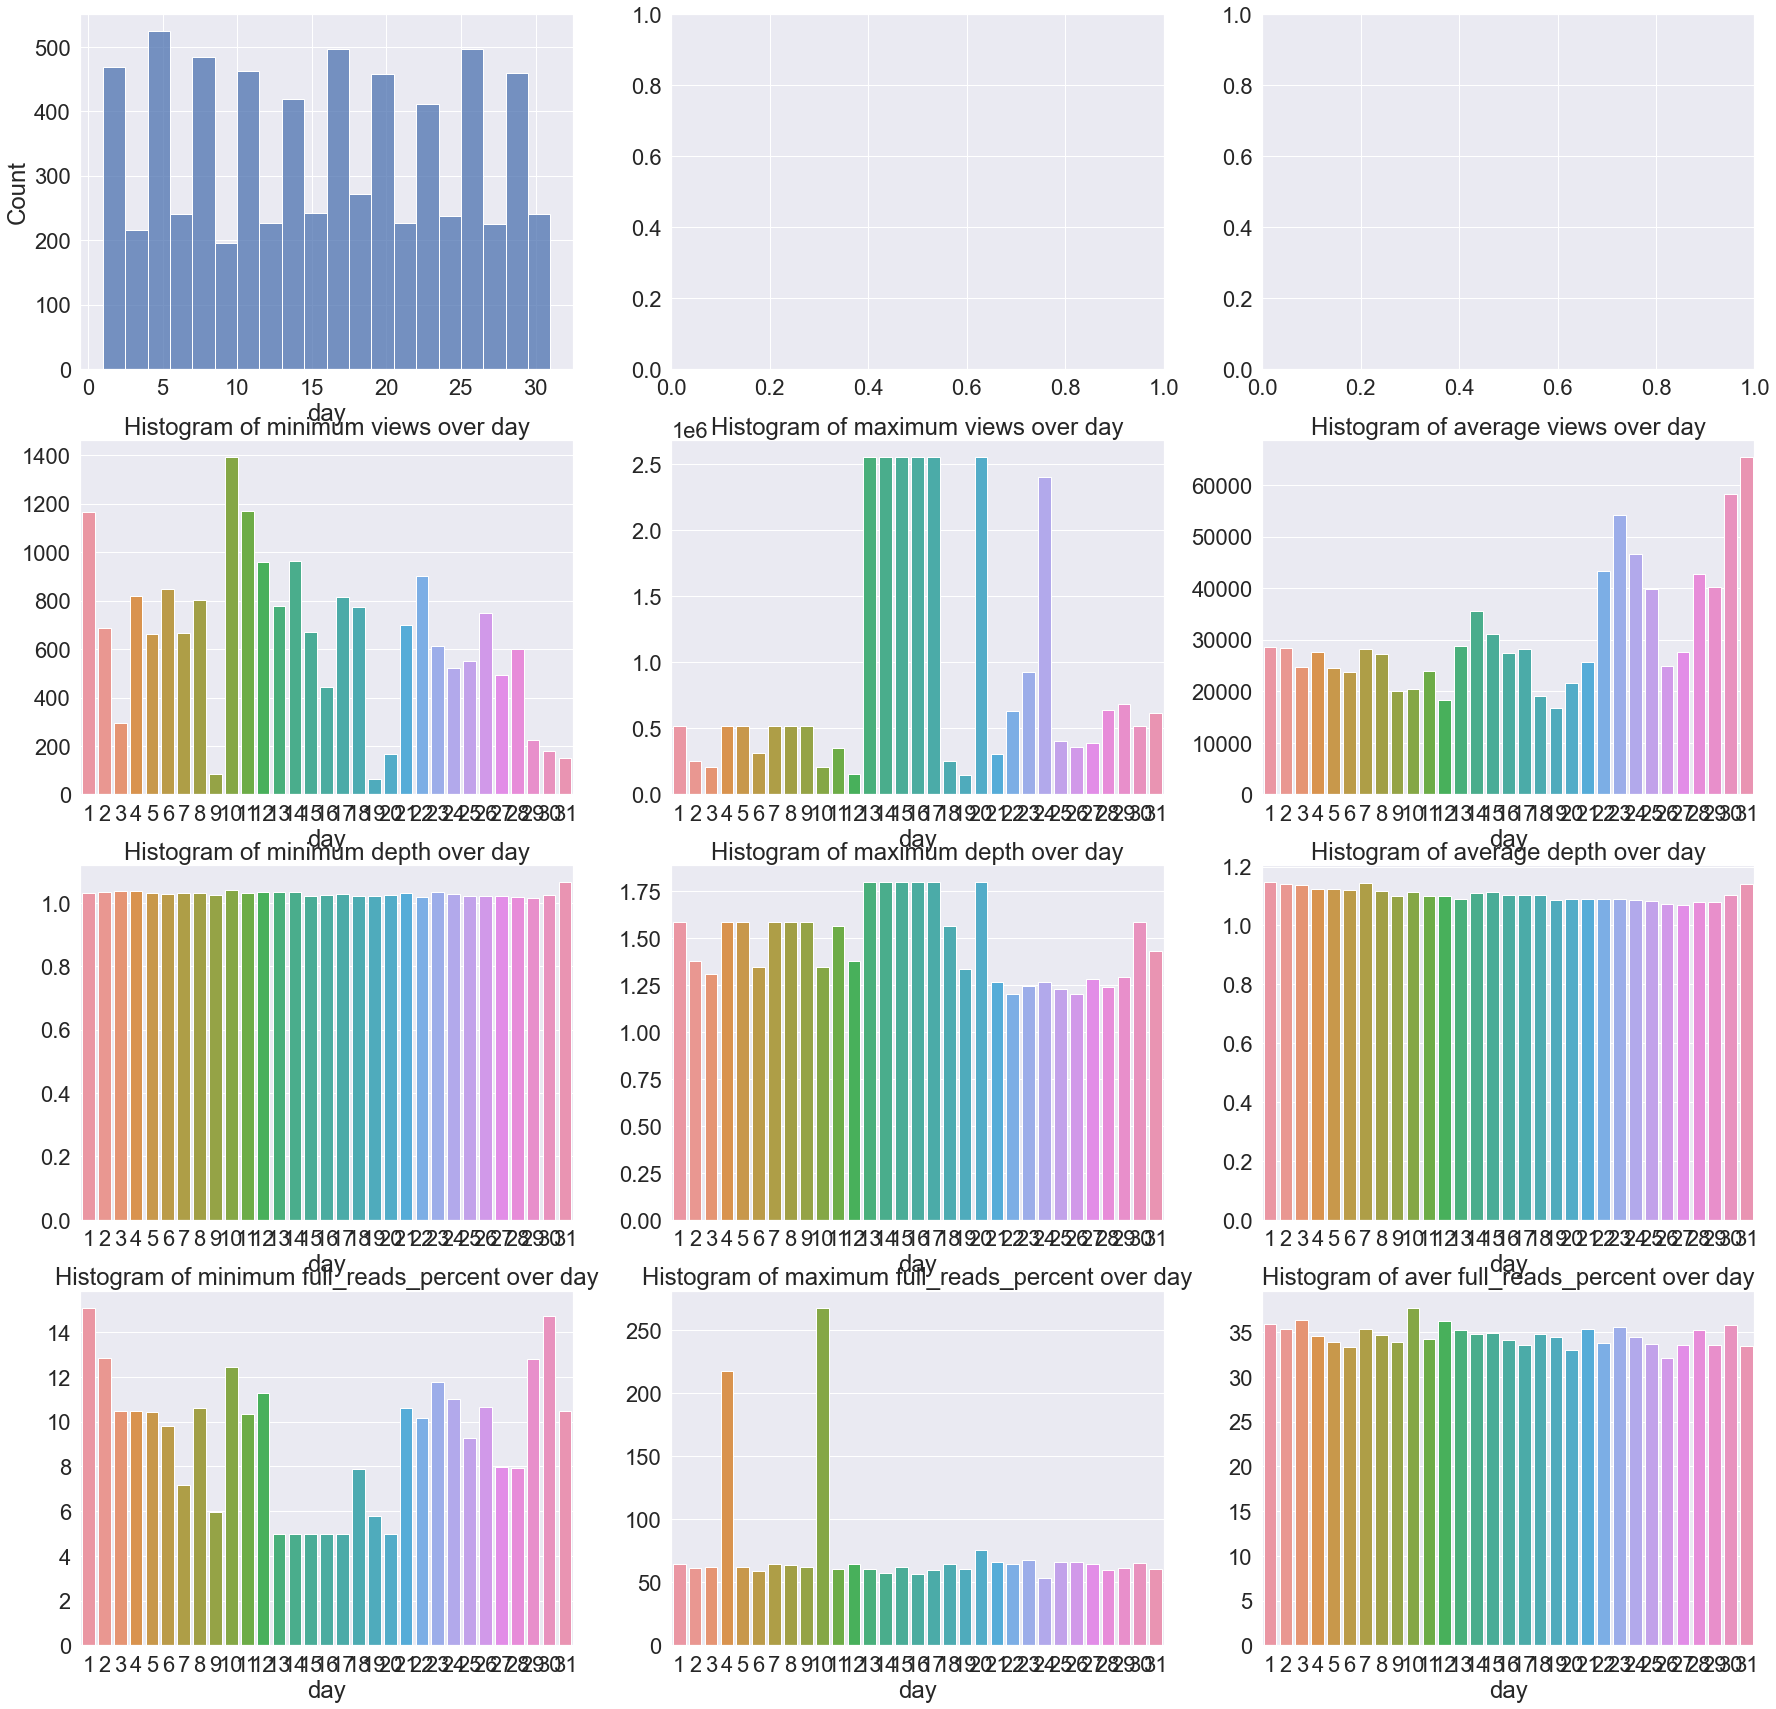

In [24]:
plot_hists_sns(df_train, 'day')

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


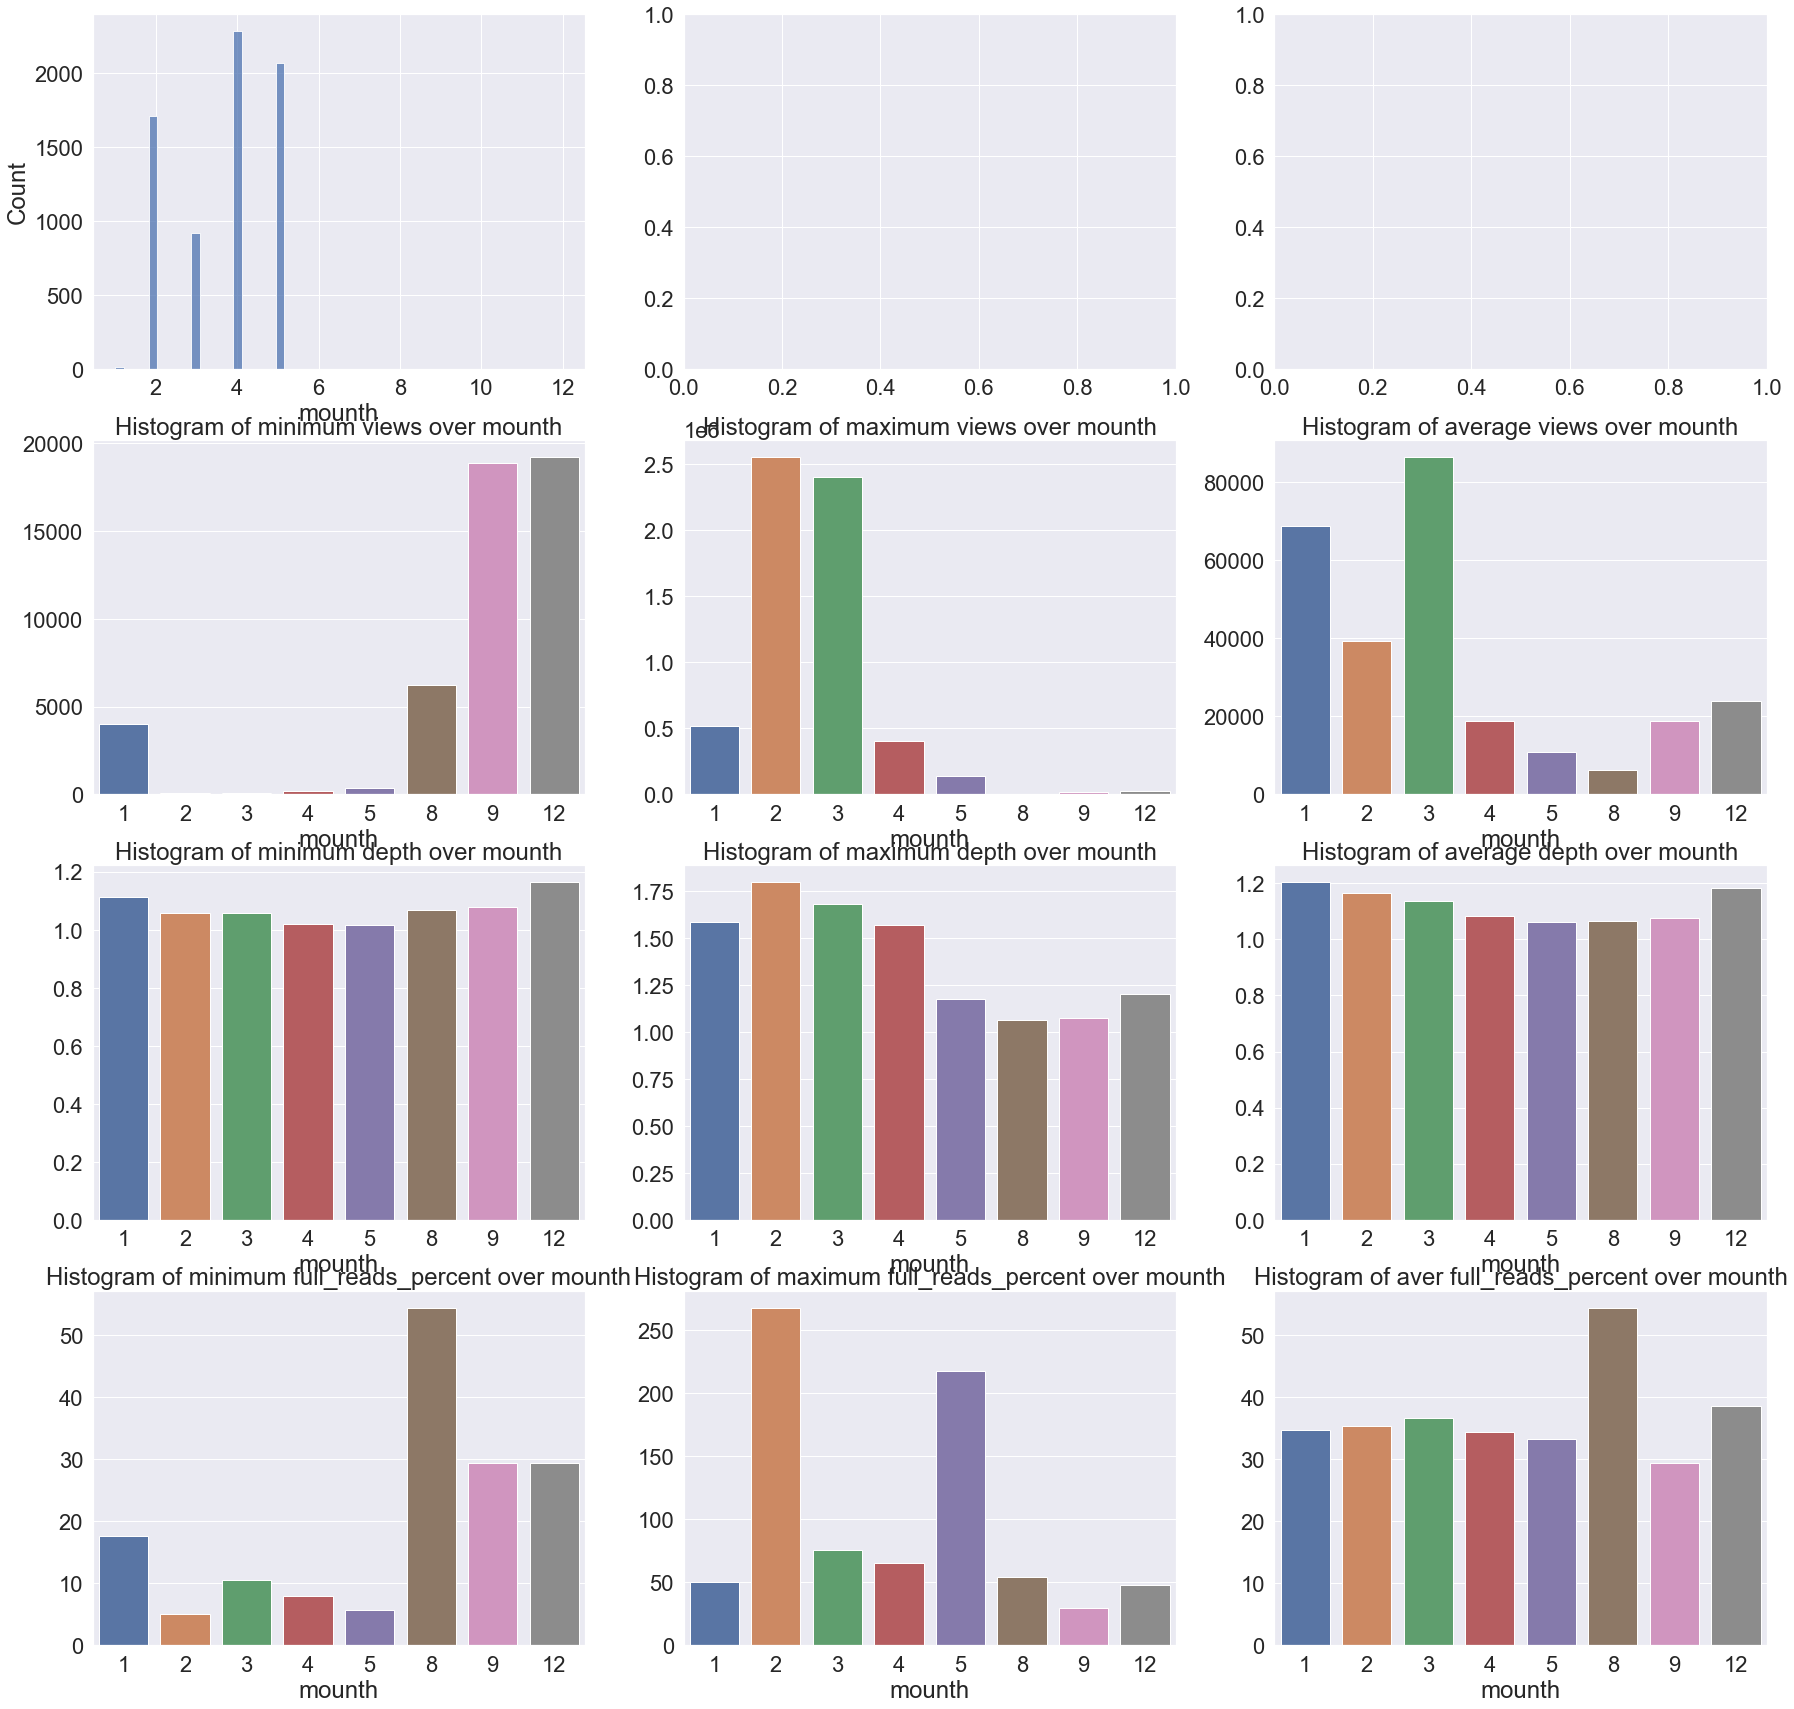

In [25]:
plot_hists_sns(df_train, 'mounth')

In [26]:
#plot_hists_sns(df_train, 'weekend')

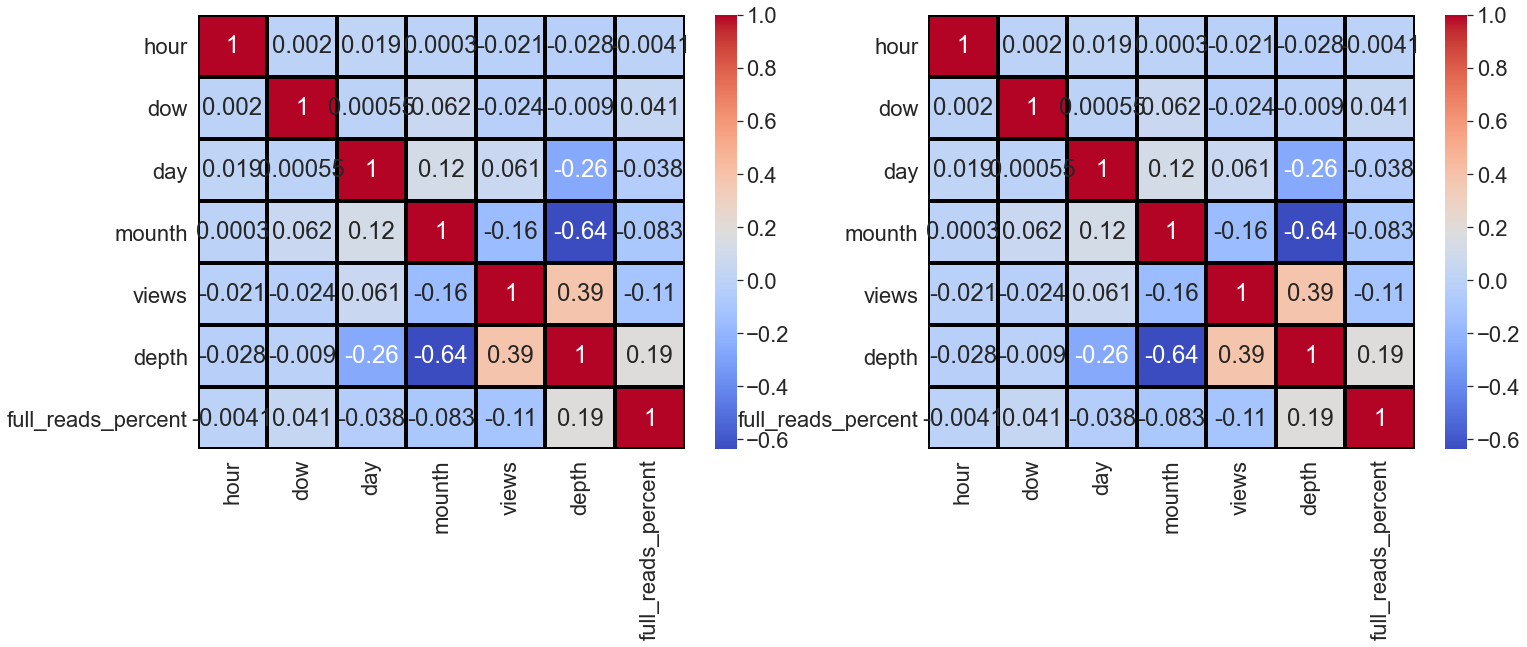

In [27]:
plot_corrc(df_train, ['hour', 'dow', 'day', 'mounth'],['views', 'depth', 'full_reads_percent']) #'weekend', 

In [28]:
df_train.columns

Index(['title', 'publish_date', 'session', 'authors', 'ctr', 'category',
       'tags', 'views', 'depth', 'full_reads_percent', 'c2', 'c3', 'hour',
       'dow', 'weekend', 'day', 'mounth'],
      dtype='object')

# category

In [29]:
df_train.category.nunique(), df_train.category.unique(), 

(9,
 array(['5409f11ce063da9c8b588a18', '5409f11ce063da9c8b588a12',
        '5433e5decbb20f277b20eca9', '540d5ecacbb20f2524fc050a',
        '540d5eafcbb20f2524fc0509', '5409f11ce063da9c8b588a13',
        '5e54e2089a7947f63a801742', '552e430f9a79475dd957f8b3',
        '5e54e22a9a7947f560081ea2'], dtype=object))

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


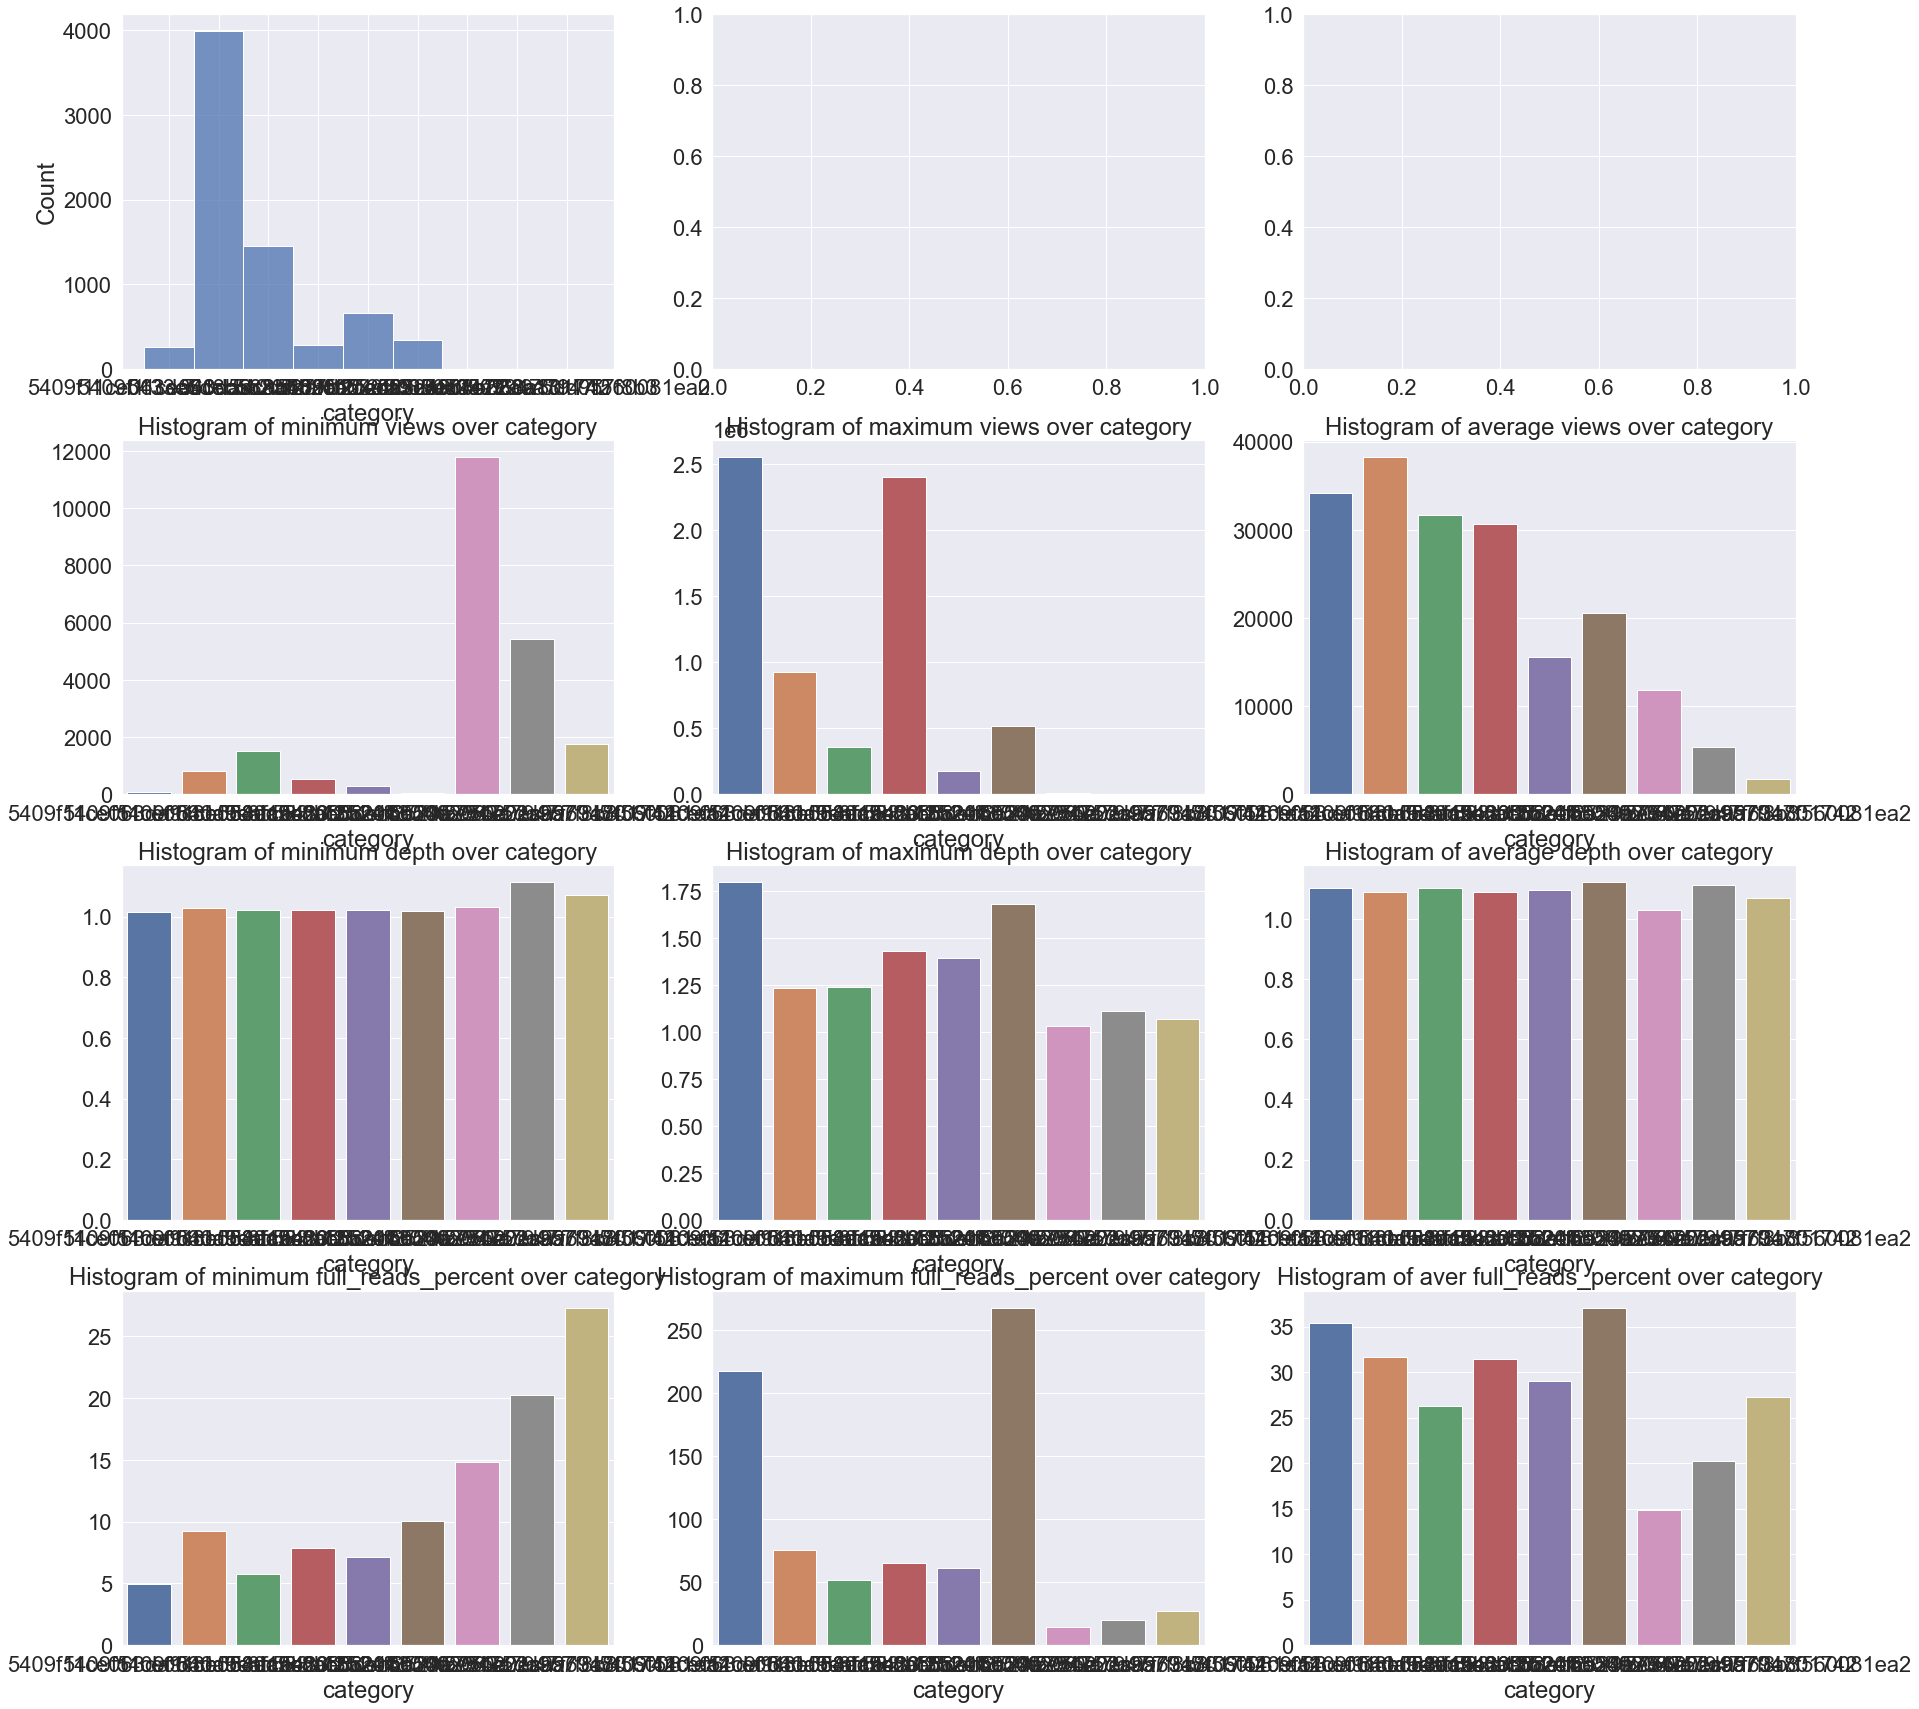

In [30]:
plot_hists_sns(df_train, 'category')

In [31]:
df_train.category.value_counts()

5409f11ce063da9c8b588a12    3988
5433e5decbb20f277b20eca9    1456
540d5eafcbb20f2524fc0509     667
5409f11ce063da9c8b588a13     338
540d5ecacbb20f2524fc050a     283
5409f11ce063da9c8b588a18     265
5e54e2089a7947f63a801742       1
552e430f9a79475dd957f8b3       1
5e54e22a9a7947f560081ea2       1
Name: category, dtype: int64

In [32]:
df_test.category.value_counts()

5409f11ce063da9c8b588a12    1718
5433e5decbb20f277b20eca9     637
540d5eafcbb20f2524fc0509     273
5409f11ce063da9c8b588a13     153
540d5ecacbb20f2524fc050a     127
5409f11ce063da9c8b588a18      92
Name: category, dtype: int64

вероятно стоит удалить последние 3 категории, что бы модель не переобучалась на них. к тому же их нет в тесте

In [33]:
exclude_category = {'5e54e2089a7947f63a801742', '552e430f9a79475dd957f8b3', '5e54e22a9a7947f560081ea2' }

In [35]:
#plot_hists_sns(df_train.query('category in @exclude_category'), 'category')

In [47]:
df_train[df_train.category == '5e54e22a9a7947f560081ea2'][['document_id', 'publish_date', 'title']]#.sample(5)

document_id         publish_date  \
4297  62752ea49a79478c0d7c728eRulLfgMDSNus4Yi-C1Oc5w  2022-05-06 15:29:04   

                                                  title  
4297  Власти Москвы в 2022 году направят на реноваци...

In [ ]:
cat_decode = {'5409f11ce063da9c8b588a12': {'name': 'politics',
                                           'link': 'politics',
                                           'last_work': 'Политика',
                                           }
              
    
}

In [48]:
df_train.iloc[4297].title

'Власти Москвы в 2022 году направят на реновацию ₽110 млрд'

In [ ]:
# 'Захарова предложила Евросоюзу «отменить себя»\n                \n                                                    \n\n    \n\n    Политика,\xa012:28'

In [106]:
#clean_text = lambda x:' '.join(re.sub('\n|\r|\t|[^а-я]', ' ', x.lower()).split())
clean_text = lambda x:' '.join(re.sub('\n|\r|\t|[^а-яА-ЯA-zA-Z]', ' ', x).split())

In [107]:
tmp_ttl = 'Захарова предложила Евросоюзу «отменить себя»\n                \n                                                    \n\n    \n\n    Политика,\xa012:28'

In [108]:
len(clean_text(tmp_ttl)), len(tmp_ttl)

(52, 142)

In [109]:
df_train['title_len_diff'] = df_train.title.apply(lambda x: len(x) - len(clean_text(x)))
df_test['title_len_diff']  = df_test.title.apply(lambda x: len(x) - len(clean_text(x)))

In [110]:
df_train[df_train.title_len_diff > 50].title.sample(10).values

array(['Три полосы МКАД встали из-за массового ДТП\n                \n                                                    \n\n    \n\n    Общество,\xa009:48',
       'Киргизия заявила о погибших при обстреле со стороны Узбекистана\n                \n                                                    \n\n    \n\n    Политика,\xa010:27',
       'Шесть человек погибли в результате стрельбы в Калифорнии\n                \n                                                    \n\n    \n\n    Общество,\xa016:03',
       'Четыре человека попали в больницу из-за пожара на скважине в ХМАО\n                \n                                                    \n\n    \n\n    Общество,\xa013:13',
       'Канцлер Австрии прибыл в Москву на встречу с Путиным\n                \n                                                    \n\n    \n\n    Политика,\xa015:04',
       'Экс-депутат Рады Кива решил попросить убежище в России\n                \n                                                    \n\

In [77]:
# 'Власти Москвы рассказали о ходе работ на Рублево-Архангельской линии\n                \n                                                    \n\n    \n\n    Город,\xa012:03',

In [ ]:
Политика, Технологии и медиа, Экономика, Общество, Бизнес, ????Финансы

In [125]:
df_test[df_test.title_len_diff > 50].title.sample(10).values

array(['«Сухой» запатентовал легкий истребитель Checkmate с одним двигателем\n                \n                                                    \n\n    \n\n    Бизнес,\xa007:03',
       'Рианна родила сына\n                \n                                                    \n\n    \n\n    Технологии и медиа,\xa023:12',
       'Суд отправил под домашний арест гаишника, сломавшего руку девушке-оперу\n                \n                                                    \n\n    \n\n    Общество,\xa020:40',
       'Приднестровское ТВ сообщило о стрельбе у границы с Украиной\n                \n                                                    \n\n    \n\n    Политика,\xa014:49',
       'Здание британского МИДа подсветили в цвета флага Украины\n                \n                                                    \n\n    \n\n    Политика,\xa000:33',
       'Абрамченко заявила, что власти не будут регулировать цены на продукты\n                \n                                      

## authors

In [ ]:
df_train['authors']  = df_train.authors.apply(lambda x: literal_eval(x))
df_train['Nauthors'] = df_train.authors.apply(lambda x: len(x))

df_test['authors']  = df_test.authors.apply(lambda x: literal_eval(x))
df_test['Nauthors'] = df_test.authors.apply(lambda x: len(x))

In [ ]:
df_train['Nauthors'].value_counts()

In [ ]:
df_test['Nauthors'].value_counts()

удивительно, что возможные значения количества авторов в трейне и тесте совпадают. можно использовать как признак  
однако значения при > 3 малы, что может привести к переобучению

In [ ]:
plot_hists_sns(df_train, 'Nauthors')

In [ ]:
df_train['Nauthors_upd'] = df_train['Nauthors'].apply(lambda x: x if x < 4 else 4) # 3

In [ ]:
df_train['Nauthors_upd'].value_counts()

In [ ]:
plot_hists_sns(df_train, 'Nauthors_upd')

In [ ]:
all_authors = set()
for el in df_train.authors.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_authors.add(el[0])
        continue
        
    for author in el:
        all_authors.add(author)

In [ ]:
len(all_authors)

In [ ]:
all_authors_test = set()
for el in df_test.authors.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_authors_test.add(el[0])
        continue
        
    for author in el:
        all_authors_test.add(author)

In [ ]:
len(all_authors_test)

In [ ]:
missed_authors = set()
for el in all_authors_test:
    if el not in all_authors:
        missed_authors.add(el)

In [ ]:
len(missed_authors)

только 2 (2%) автора не представленны в обучающей выборке

In [ ]:
plot_corrc(df_train, ['Nauthors'], ['views', 'depth', 'full_reads_percent'])

## tags

In [ ]:
df_train['tags']  = df_train.tags.apply(lambda x: literal_eval(x))
df_train['Ntags'] = df_train.tags.apply(lambda x: len(x))

df_test['tags']  = df_test.tags.apply(lambda x: literal_eval(x))
df_test['Ntags'] = df_test.tags.apply(lambda x: len(x))

In [ ]:
df_train.Ntags.value_counts()

In [ ]:
df_test.Ntags.value_counts()

в тест есть статьи с большим количеством тэгов чем в трейне. хоть их количество и мало

In [ ]:
plot_hists_sns(df_train, 'Ntags')

In [ ]:
all_tags = set()
for el in df_train.tags.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_tags.add(el[0])
        continue
        
    for tag in el:
        all_tags.add(tag)

In [ ]:
len(all_tags)

In [ ]:
all_tags_test = set()
for el in df_test.tags.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_tags_test.add(el[0])
        continue
        
    for tag in el:
        all_tags_test.add(tag)

In [ ]:
len(all_tags_test)

In [ ]:
missed_tags = set()
for el in all_tags_test:
    if el not in all_tags:
        missed_tags.add(el)


In [ ]:
len(missed_tags)

1149 (17%) тэгов не представлены в обучающей выборке!!!!!

## ctr

In [ ]:
df_train.hist('ctr', bins = 40, figsize=(24, 8))

In [ ]:
df_train.ctr.min(), df_train.ctr.max()

In [ ]:
plot_corrc(df_train, ['ctr'], ['views', 'depth', 'full_reads_percent'])

In [ ]:
df_train.columns

In [ ]:

#df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
#df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

## Correlation

In [ ]:
num_cols = ['views', 'depth', 'full_reads_percent', 
            'ctr',
            'hour', 'dow','mounth', #'day', 'weekend',
            'Nauthors', #'Nauthors_upd', 
            #'Ntags',
           ]

In [ ]:
f, ax = plt.subplots(figsize=(30, 16))
ax = sns.heatmap(df_train[num_cols].corr(), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black',)

In [ ]:
f, ax = plt.subplots(figsize=(30, 16))
ax = sns.heatmap(df_train[num_cols].corr(method='spearman'), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [ ]:
sns.pairplot(df_train[num_cols])